In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

In [63]:
city_data

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [64]:
ride_data

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2018-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2018-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2018-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2018-05-07 19:22:15,44.94,4256853490277


In [65]:
merge_data = pd.merge(city_data, ride_data, on="city")

In [66]:
merge_data.sort_values('city')

,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421
...,...,...,...,...,...,...
1541,Williamsview,46,Urban,2018-01-15 00:10:14,44.33,4627033032394
1545,Williamsview,46,Urban,2018-05-04 14:56:45,32.80,2677734881755
1542,Williamsview,46,Urban,2018-04-07 00:32:37,18.92,23948941587
1547,Williamsview,46,Urban,2018-04-15 16:09:08,44.74,2759396812039


In [67]:
merge_data["city"][1]

'Richardfort'

In [68]:
merge_data["city"].unique()

array(['Richardfort', 'Williamsstad', 'Port Angela', 'Rodneyfort',
       'West Robert', 'West Anthony', 'West Angela', 'Martinezhaven',
       'Karenberg', 'Barajasview', 'Robertport', 'Joneschester',
       'Leahton', 'West Christopherberg', 'Johnton', 'Reynoldsfurt',
       'Port David', 'New Kimberlyborough', 'Carriemouth', 'Rogerston',
       'Jerryton', 'Loganberg', 'Simpsonburgh', 'Port Frank',
       'South Latoya', 'West Samuelburgh', 'Grahamburgh',
       'West Patrickchester', 'North Madeline', 'South Jack', 'Liumouth',
       'West Ericstad', 'Royland', 'Erikaland', 'Huntermouth',
       'Justinberg', 'South Evanton', 'Lake Danielberg',
       'East Kaylahaven', 'West Heidi', 'Karenside', 'South Karenland',
       'West Gabriel', 'North Markport', 'Raymondhaven', 'North Barbara',
       'Lake Scottton', 'West Josephberg', 'Pattyland',
       'South Michelleport', 'Christopherfurt', 'Valentineton',
       'South Phillip', 'North Jason', 'Deanville', 'Lake Jonathanshire',
   

In [95]:
new_data = merge_data.groupby("city").agg({'driver_count':'count', "ride_id":"count", "fare":"mean"}).rename(columns={"ride_id":"Number of rides", "driver_count":"Number of driver", "fare":"Average fare"})
new_data

,Number of driver,Number of rides,Average fare
city,,,
Amandaburgh,18,18,24.641667
Barajasview,22,22,25.332273
Barronchester,16,16,36.422500
Bethanyland,18,18,32.956111
Bradshawfurt,10,10,40.064000
...,...,...,...
West Robert,31,31,25.123871
West Samuelburgh,25,25,21.767600
Williamsonville,14,14,31.875000


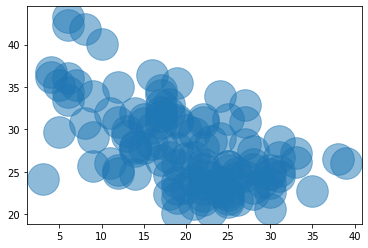

In [97]:
plt.scatter(x=new_data["Number of rides"],y=new_data["Average fare"], s=1000, alpha=0.5)

In [102]:
urban = merge_data.groupby("type").agg({"fare":"sum", "ride_id":"count"})
urban

,fare,ride_id
type,,
Rural,4327.93,125
Suburban,19356.33,625
Urban,39854.38,1625


([<matplotlib.patches.Wedge at 0x1be3fe17648>,
 [Text(1.0749106638891923, 0.23359594315247792, 'Rural'),
  Text(0.2031702810667748, 1.0810743900820368, 'Suburban'),
  Text(-0.42811329447141844, -1.0132714380149224, 'Urban')])

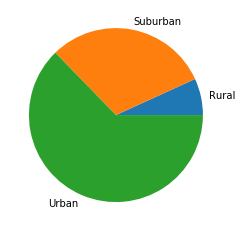

In [104]:
labels = 'Rural', 'Suburban', 'Urban'
plt.pie([4327.93,19356.33,39854.38], labels=labels)

([<matplotlib.patches.Wedge at 0x1be3fe51688>,
 [Text(1.0849974335199486, 0.1810540506454493, 'Rural'),
  Text(0.4418649348526167, 1.0073506734735889, 'Suburban'),
  Text(-0.601642880908579, -0.9208831868657531, 'Urban')])

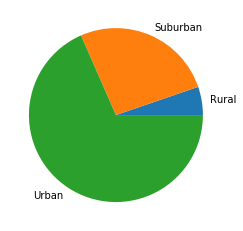

In [105]:
plt.pie([125, 625, 1625], labels=labels)